In [2]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime
import requests
import os
from wordcloud import WordCloud

## Get data from API data extraction script

In [4]:
## sample_size: record will return with a multiple of 10
## This will take time ~ 10 min. It depend on the sample size and videos in a playlist
## considering 300 because search records also contains playlist which increases our total video record count
query = {"keyword": "Python","sample_size":50}
response = requests.post("http://127.0.0.1:5000/", params = query)
response.json()

In [5]:
dirname = "analysis"
if not os.path.exists(dirname):
        os.makedirs(dirname)

dirname = "data"
if not os.path.exists(dirname):
        os.makedirs(dirname)
del dirname
os.makedirs("analysis/"+query["keyword"])
os.makedirs("analysis/"+query["keyword"]+"/taglevel")
os.makedirs("analysis/"+query["keyword"]+"/taglevel/channel")
os.makedirs("analysis/"+query["keyword"]+"/taglevel/playlist")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'analysis/Python'

## Importing Data

In [27]:
search_data = pd.read_csv("data/"+ query["keyword"] +"/processed_search_data.csv")
playlist_data = pd.read_csv("data/"+ query["keyword"] +"/processed_playlist_video_data.csv")
video_data = pd.read_csv("data/"+ query["keyword"] +"/processed_video_data.csv",low_memory=False)

In [28]:
## size of a datasets
search_data.shape, playlist_data.shape, video_data.shape

((50, 35), (494, 22), (539, 723))

In [10]:
## removing duplicates record
search_data.drop_duplicates(inplace=True),playlist_data.drop_duplicates(inplace=True),video_data.drop_duplicates(inplace=True)

(None, None, None)

In [30]:
video_data[[col for col in video_data.columns if "keyword" in col]].head().T

,0,1,2,3,4
keywords->0,Python Tutorial in Hindi,python tutorial,python,yt:cc=on,Great Learning
keywords->1,Learn Python in Hindi,python,python tutorial,python tutorial,Great Lakes
keywords->2,Python Full Course in Hindi,python for beginners,python language,python,Python Tutorial in Hindi
keywords->3,Python Tutorial for beginners,python tutorial for beginners,python full course,python for beginners,Python in Hindi
keywords->4,python hindi,learn python,python course,python tutorial for beginners,Learn Python in Hindi
keywords->5,complete python tutorial,python crash course,learn python,python full course,Python tutorial for beginners in Hindi
keywords->6,python tutorial by harry,python 2019,learn python programming,python programming,Python Full Course in Hindi
keywords->7,python tutorial code with harry,python tutorial for beginners full,python tutorial for beginners,python (programming language),Python Hindi
keywords->8,python tutorial by Harry bhai,python (programming language),python tutorial 2018,python programming language,Python Programming in Hindi
keywords->9,python tutorial in hindi,python basics,python programming tutorial,learn python,Python Tutorial in Hindi for beginners


In [11]:
## size of a datasets
search_data.shape, playlist_data.shape, video_data.shape

((50, 35), (494, 22), (539, 723))

In [12]:
temp = round(100*(search_data["type"].value_counts())/search_data["type"].shape[0],2)
temp

video       94.0
playlist     6.0
Name: type, dtype: float64

## Youtube Search

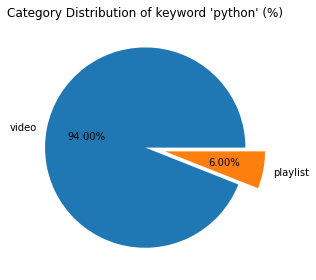

In [13]:
plt.pie(temp,explode=tuple([0] + [0.2]*(temp.shape[0]-1)),labels=temp.index,autopct='%1.2f%%')
plt.title("Category Distribution of keyword 'python' (%)")
plt.tight_layout()
plt.show()
del temp

## Data Cleaning and Formatting

In [25]:
## fetched records have multiple entries
video_data["id"].value_counts()

NameError: name 'video_data' is not defined

In [15]:
# Dropping duplicate video records and selecting video with maximum views
video_data = video_data.sort_values("viewCount->text",ascending=False).drop_duplicates("id")

In [16]:
## merging all three dataset with playlist id and video id.
playlist_details = search_data[["id","title"]][search_data["type"]=="playlist"].copy()
playlist_data = pd.merge(playlist_data,playlist_details,how="right",left_on="playlist_id",right_on="id")
combined_data = pd.merge(playlist_data,video_data,how="left",left_on="id_x",right_on="id")
del playlist_details, playlist_data, video_data
combined_data.head(2)

,id_x,title_x,thumbnails->0->url_x,thumbnails->0->width_x,thumbnails->0->height_x,thumbnails->1->url_x,thumbnails->1->width_x,thumbnails->1->height_x,thumbnails->2->url_x,thumbnails->2->width_x,...,streamingData->adaptiveFormats->9->type,streamingData->adaptiveFormats->10->type,streamingData->adaptiveFormats->12->type,streamingData->adaptiveFormats->13->type,streamingData->dashManifestUrl,streamingData->adaptiveFormats->2->type,streamingData->adaptiveFormats->5->type,streamingData->adaptiveFormats->6->type,streamingData->adaptiveFormats->8->type,streamingData->adaptiveFormats->11->type
0,QXeEoD0pB3E,#0 Python Programming Tutorial for Beginners |...,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,168,94,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,196,110,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hEgO047GxaQ,#1 Python Tutorial for Beginners | Introductio...,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,168,94,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,196,110,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## converting duration to seconds
combined_data['duration_second'] = combined_data['duration'].apply(lambda x: sum(int(value)*60**index for index,value in enumerate(reversed(x.split(":")))))
combined_data.drop("duration",axis=1,inplace=True)
combined_data.head(2)

,id_x,title_x,thumbnails->0->url_x,thumbnails->0->width_x,thumbnails->0->height_x,thumbnails->1->url_x,thumbnails->1->width_x,thumbnails->1->height_x,thumbnails->2->url_x,thumbnails->2->width_x,...,streamingData->adaptiveFormats->10->type,streamingData->adaptiveFormats->12->type,streamingData->adaptiveFormats->13->type,streamingData->dashManifestUrl,streamingData->adaptiveFormats->2->type,streamingData->adaptiveFormats->5->type,streamingData->adaptiveFormats->6->type,streamingData->adaptiveFormats->8->type,streamingData->adaptiveFormats->11->type,duration_second
0,QXeEoD0pB3E,#0 Python Programming Tutorial for Beginners |...,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,168,94,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,196,110,https://i.ytimg.com/vi/QXeEoD0pB3E/hqdefault.j...,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
1,hEgO047GxaQ,#1 Python Tutorial for Beginners | Introductio...,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,168,94,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,196,110,https://i.ytimg.com/vi/hEgO047GxaQ/hqdefault.j...,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253


In [26]:
combined_data.shape

(494, 61)

In [19]:
# dropping empty columns
combined_data_temp = 100*(combined_data.isna().sum())/combined_data.shape[0]
combined_data_temp = combined_data_temp[combined_data_temp==100]
combined_data.drop(combined_data_temp.index,axis=1,inplace=True)
del combined_data_temp

In [20]:
combined_data.shape

(494, 675)

In [21]:
## removing thumbnails details
drop_col = [col for col in combined_data.columns if "thumbnail" in col]
combined_data.drop(drop_col,axis=1,inplace=True)
del drop_col

In [22]:
## seperating streaming data for analysis in later stage
combined_streaming_data = combined_data[[col for col in combined_data.columns if "streamingData" in col]].copy()
combined_streaming_data.shape

(494, 587)

In [23]:
## dropping streamingData related columns
combined_data.drop(combined_streaming_data.columns,axis=1,inplace=True)

In [24]:
combined_data.shape

(494, 61)

## Classfying tags from Videos

In [21]:
## extracting unique keywords and removing null values
keyword_list = list(set(list(combined_data[[col for col in combined_data.columns if "keyword" in col]].to_numpy().flatten())))
keyword_list = [x for x in keyword_list if str(x) != 'nan']
len(keyword_list)

2202

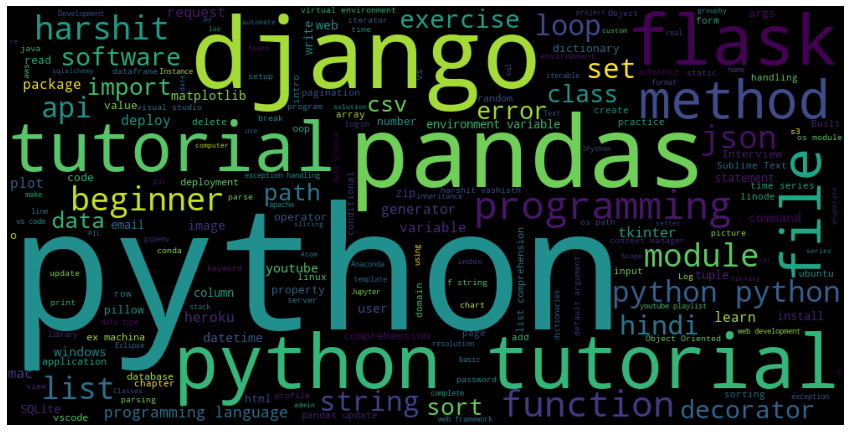

In [22]:
## word cloud to visualize most frequent words.
#convert list to string and generate
unique_string=(" ").join(keyword_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
## combining all the tags in a single string and excluding null records
combined_data["keyword"] = combined_data[[col for col in combined_data.columns if "keywords" in col]].fillna("empty").astype(str).agg("-".join,axis=1).str.replace("-empty|empty","").str.lower()

We can also consider more categories like:
1. language(s): Content are in what language. I am considering Arabic and English for the time being
2. Topic: like strings, list, generators, installation,etc.

In [24]:
tag_category = ["tutorial","hindi","live","regular","api",
             "advanced","beginner","flask","django","data science","بايثون",query["keyword"].lower()]

In [25]:
def find_cat(x):
    out = ''
    global tag_category
    if x == "":
        return "No Category"
    
    for cat in tag_category:
        if cat in x:
            if cat == "بايثون":
                cat = "Arabic"
            out += cat+","
    if out == '':
        return "Others"
    else:
        return out[:-1]

In [26]:
combined_data["category"] = combined_data["keyword"].map(find_cat)

In [27]:
combined_data["category"].value_counts()

tutorial,python                                181
python                                          52
tutorial,hindi,python                           50
tutorial,beginner,python                        44
tutorial,hindi,beginner,python                  44
tutorial,data science,python                    26
tutorial,django,python                          14
tutorial,beginner,django,python                 12
hindi,python                                    11
No Category                                     10
tutorial,beginner,flask,python                  10
Others                                          10
tutorial,api,data science,python                 6
tutorial,api,python                              6
tutorial,flask,python                            5
beginner,python                                  3
hindi,beginner,python                            2
tutorial,beginner,data science,python            2
tutorial,advanced,beginner,python                2
tutorial,hindi,beginner,data sc

In [28]:
# بايثون is used to identify videos in arabic
tag_category.append("Arabic")
tag_category.remove('بايثون')

Removing column that contains "keyword" and "accessibility" from the dataframe

In [29]:
combined_data = combined_data[[col for col in combined_data.columns if "keyword" not in col and "accessibility" not in col]]

In [30]:
combined_data.head()

,id_x,title_x,channel->name_x,channel->id_x,channel->link_x,link_x,playlist_id,id_y,title_y,id,...,description,channel->name_y,channel->id_y,channel->link_y,averageRating,publishDate,uploadDate,link_y,duration_second,category
0,QXeEoD0pB3E,#0 Python Programming Tutorial for Beginners |...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/watch?v=QXeEoD0pB3E,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python Tutorial for Beginners (Full Course),QXeEoD0pB3E,...,Python Became the Best Programming Language of...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,4.952140,2018-08-16,2018-08-16,https://www.youtube.com/watch?v=QXeEoD0pB3E,66,"tutorial,python"
1,hEgO047GxaQ,#1 Python Tutorial for Beginners | Introductio...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/watch?v=hEgO047GxaQ,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python Tutorial for Beginners (Full Course),hEgO047GxaQ,...,Python Tutorial to learn Python programming wi...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,4.935874,2018-06-30,2018-06-30,https://www.youtube.com/watch?v=hEgO047GxaQ,253,"tutorial,data science,python"
2,mbryl4MZJms,#2 Python Tutorial for Beginners | Python Inst...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/watch?v=mbryl4MZJms,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python Tutorial for Beginners (Full Course),mbryl4MZJms,...,Download Python : https://goo.gl/hYmDPt\nDownl...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,4.926794,2018-07-01,2018-07-01,https://www.youtube.com/watch?v=mbryl4MZJms,513,"tutorial,python"
3,DWgzHbglNIo,#3 Python Tutorial for Beginners | Getting Sta...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/watch?v=DWgzHbglNIo,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python Tutorial for Beginners (Full Course),DWgzHbglNIo,...,Python Tutorial to learn Python programming wi...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,4.956956,2018-07-02,2018-07-02,https://www.youtube.com/watch?v=DWgzHbglNIo,889,"tutorial,python"
4,TqPzwenhMj0,#4 Python Tutorial for Beginners | Variables i...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/watch?v=TqPzwenhMj0,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python Tutorial for Beginners (Full Course),TqPzwenhMj0,...,Python Tutorial to learn Python programming wi...,Telusko,UC59K-uG2A5ogwIrHw4bmlEg,https://www.youtube.com/channel/UC59K-uG2A5ogw...,4.951555,2018-07-02,2018-07-02,https://www.youtube.com/watch?v=TqPzwenhMj0,622,"tutorial,python"


In [31]:
combined_data[['channel->link_y','channel->link_x']].drop_duplicates().head()

,channel->link_y,channel->link_x
0,https://www.youtube.com/channel/UC59K-uG2A5ogw...,https://www.youtube.com/channel/UC59K-uG2A5ogw...
100,https://www.youtube.com/channel/UC59K-uG2A5ogw...,NaN
110,https://www.youtube.com/channel/UCrkQMtWNtuq-1...,https://www.youtube.com/channel/UCrkQMtWNtuq-1...
149,NaN,https://www.youtube.com/channel/UCrkQMtWNtuq-1...
210,https://www.youtube.com/channel/UCrkQMtWNtuq-1...,NaN


In [32]:
# Some record have Null value (it may be due to open source api) and As these column have same data so merging them
combined_data["channelName"] = combined_data['channel->name_y'].combine_first(combined_data['channel->name_x']).copy()
combined_data["channelId"] = combined_data['channel->id_y'].combine_first(combined_data['channel->id_x']).copy()
combined_data["videoId"] = combined_data['id'].combine_first(combined_data['id_x']).copy()
combined_data["videoTitle"] = combined_data['title_x'].combine_first(combined_data['title']).copy()

In [33]:
# column rename
combined_data.rename(columns={"title_y":"playlistTitle",'viewCount->text':'viewCount',
                              'duration_second':'durationSeconds','playlist_id':'playlistId'},inplace=True)

In [34]:
# Dropping same columns and description
drop_col = ['description', 'channel->name_x', 'channel->name_y', 'channel->id_x', 'channel->id_y',
            'channel->link_y', 'channel->link_x', 'id_y', 'id', 'id_x', 'title', 'title_x', 'link_y', 'link_x', 'id_y']
combined_data.drop(drop_col,axis=1,inplace=True)

In [35]:
filename = "data/"+ query["keyword"] +"/combined_cleaned_processed_data.csv"
combined_data.to_csv(filename, index=False)

In [36]:
# combined_data = pd.read_csv(filename,index_col='Unnamed: 0')
# combined_data.head(2)

## Metrics Required for Analysis

In [37]:
def video_analysis(dataset, tag_category):
    '''This function will calcualte metrics for all the videoids
            dataset: dataframe that contain videoid details
            tag_category: tags categories list
        Output: Analysed dataframe
        '''
    
    analysis_list = []
    
    for cat in tag_category:
        dataset_category_level = dataset[dataset["category"].str.contains(cat)]
        
        if not  dataset_category_level.empty:
            df = pd.DataFrame(dataset_category_level.mean()).T
            df.rename(columns={'viewCount':'Average Views','averageRating':'Average Rating',
                                                 'durationSeconds':'Average Video Duration'},inplace=True)

            df_minviews = dataset_category_level[["videoTitle","viewCount"]].sort_values("viewCount",ascending=True).reset_index().head(1)
            df_minviews.rename(columns={'videoTitle':'Least Viewed Video Title','viewCount':'Least Viewed Count',
                                   'videoId':'Least Viewed Video Id'},inplace=True)

            df_maxviews = dataset_category_level[["videoTitle","viewCount"]].sort_values("viewCount",ascending=False).reset_index().head(1)
            df_maxviews.rename(columns={'videoTitle':'Most Viewed Video Title','viewCount':'Most Viewed Count',
                                   'videoId':'Most Viewed Video Id'},inplace=True)

            df_minratings = dataset_category_level[["videoTitle","averageRating"]].sort_values("averageRating",ascending=True).reset_index().head(1)
            df_minratings.rename(columns={'videoTitle':'Least Rated Video Title','averageRating':'Minimum Rating',
                                   'videoId':'Least Rated Video Id'},inplace=True)

            df_maxratings = dataset_category_level[["videoTitle","averageRating"]].sort_values("averageRating",ascending=False).reset_index().head(1)
            df_maxratings.rename(columns={'videoTitle':'Most Rated Video Title','averageRating':'Maximum Rating',
                                   'videoId':'Most Rated Video Id'},inplace=True)

            df_minduration = dataset_category_level[["videoTitle","durationSeconds"]].sort_values("durationSeconds",ascending=True).reset_index().head(1)
            df_minduration.rename(columns={'videoTitle':'Shortest Video Title','durationSeconds':'Shortest Duration',
                                   'videoId':'Shortest Video Id'},inplace=True)

            df_maxduration = dataset_category_level[["videoTitle","durationSeconds"]].sort_values("durationSeconds",ascending=False).reset_index().head(1)
            df_maxduration.rename(columns={'videoTitle':'Longest Video Title','durationSeconds':'Longest Duration',
                                   'videoId':'Longest Video Id'},inplace=True)

            df.loc[0,"Total Views"] = pd.DataFrame(dataset_category_level[["viewCount"]].sum()).iloc[0,0]
            df.loc[0,"Total Videos"] = dataset_category_level.shape[0]

            df = pd.concat([df, df_minviews, df_maxviews, df_minratings, df_maxratings, df_minduration, df_maxduration],axis=1)
            df.rename(index={0:cat},inplace=True)

            analysis_list.append(df)
    df_analysis = pd.concat(analysis_list)
    
    ## Formatting ratings, view count and duration

    df_analysis[['Average Views', 'Total Views', 'Least Viewed Count', 'Most Viewed Count']] = df_analysis[['Average Views', 'Total Views', 'Least Viewed Count', 'Most Viewed Count']].applymap(lambda x: str(int(x)) if x<1000 else ( str(round(x/1000,1))+ " K" if x>=1000 and x < 1000000 else str(round(x/1000000,1)) + " M" ))
    df_analysis[['Average Video Duration', 'Shortest Duration', 'Longest Duration']] = df_analysis[['Average Video Duration', 'Shortest Duration', 'Longest Duration']].round(0).applymap(lambda x: str(datetime.timedelta(seconds = x)))
    df_analysis[["Average Rating", "Minimum Rating", "Maximum Rating"]] = df_analysis[["Average Rating", "Minimum Rating", "Maximum Rating"]].round(2)
    
    return df_analysis

## Video - Tags Analysis

We are analysing video data metrics on a tags category

In [38]:
video_dataset = combined_data[[col for col in combined_data.columns if col not in ["playlistId","playlistTitle"]]].copy()
video_dataset.shape

(494, 10)

In [39]:
video_dataset["videoId"].value_counts()

W_g0OiLYwXI    1
2IsF7DEtVjg    1
o4RsQSrlKOM    1
44PvX0Yv368    1
RSl87lqOXDE    1
              ..
ms13AMj3yVk    1
jTYiNjvnHZY    1
O3RoHm1-A1I    1
QaKFY_m9nAQ    1
cmSXHAS-QKY    1
Name: videoId, Length: 494, dtype: int64

In [40]:
video_dataset.drop_duplicates(inplace=True)

In [41]:
video_dataset.shape[0] == video_dataset["videoId"].nunique()

True

In [42]:
video_dataset.set_index("videoId",inplace=True)

In [43]:
video_dataset.head(2)

,viewCount,averageRating,publishDate,uploadDate,durationSeconds,category,channelName,channelId,videoTitle
videoId,,,,,,,,,
QXeEoD0pB3E,3801999.0,4.952140,2018-08-16,2018-08-16,66,"tutorial,python",Telusko,UC59K-uG2A5ogwIrHw4bmlEg,#0 Python Programming Tutorial for Beginners |...
hEgO047GxaQ,2659163.0,4.935874,2018-06-30,2018-06-30,253,"tutorial,data science,python",Telusko,UC59K-uG2A5ogwIrHw4bmlEg,#1 Python Tutorial for Beginners | Introductio...


In [44]:
video_dataset.fillna(0,inplace=True)

In [45]:
video_dataset.shape,video_dataset.dropna().shape

((494, 9), (494, 9))

In [46]:
video_analysis_result = video_analysis(video_dataset, tag_category)
video_analysis_result.head(2)

,Average Views,Average Rating,Average Video Duration,Total Views,Total Videos,Least Viewed Video Id,Least Viewed Video Title,Least Viewed Count,Most Viewed Video Id,Most Viewed Video Title,...,Minimum Rating,Most Rated Video Id,Most Rated Video Title,Maximum Rating,Shortest Video Id,Shortest Video Title,Shortest Duration,Longest Video Id,Longest Video Title,Longest Duration
tutorial,263.7 K,4.95,0:14:08,107.1 M,406.0,8o6HmJxi9pQ,Read CSV files with DictReader : Python tutori...,18.1 K,QXeEoD0pB3E,#0 Python Programming Tutorial for Beginners |...,...,4.71,uVNfQDohYNI,Python Flask Tutorial: Full-Featured Web App P...,5.00,XqrICVWDL60,Chapter 2 : Exercise 2 : Python tutorial 28,0:00:27,wRIUnHO_6KY,Python Project Create Real Software,3:32:42
hindi,98.2 K,4.95,0:06:20,10.6 M,108.0,H4YjxLe-eyU,Exercise 2 Better solution : Python tutorial 221,15.0 K,RAwntanK4wQ,Complete Python 3 Course (Introduction),...,4.71,Kr_1Fr5DL_0,Exercise 1 solution : Python tutorial 144,4.99,XqrICVWDL60,Chapter 2 : Exercise 2 : Python tutorial 28,0:00:27,7MQWCtTr0zA,"Create GUI App with Python , Tkinter [1]",1:21:26


In [47]:
# saving analysis
filename = "analysis/"+ query["keyword"] + "/video.csv"
video_analysis_result.to_csv(filename)
del video_analysis_result

## Playlists - Tags Analysis

In [48]:
playlist_dataset = combined_data[['playlistId', 'playlistTitle', 'viewCount', 'averageRating',
                                   'publishDate', 'uploadDate', 'durationSeconds', 'category']].copy()
playlist_dataset.shape

(494, 8)

In [49]:
def tag_analysis(dataset):
    '''This function will calcualte metrics for all the videoids
        dataset: dataframe that contain videoid details
        tag_category: tags categories list
        Output: Analysed dataframe
        '''        
    df_mean = pd.DataFrame(dataset[['Total Videos', 'Average Video Rating', 'Total Views', 'Total Duration']].mean()).T
    df_mean.columns = df_mean.columns.str.replace("Total","Average")

    df_sum = pd.DataFrame(dataset[['Total Videos', 'Total Views']].sum()).T
    
    df_min = pd.DataFrame(dataset[[ 'Oldest Video Publish Date', 'Oldest Video Uploaded Date']].min()).T
    
    df_max = pd.DataFrame(dataset[[ 'Recent Video Publish Date', 'Recent Video Uploaded Date']].max()).T
    
    df = pd.concat([df_mean, df_sum, df_min, df_max],axis=1)

    ## Formatting ratings, view count and duration
    df[['Average Videos', 'Average Views', 'Total Videos', 'Total Views']] = df[['Average Videos', 'Average Views', 'Total Videos', 'Total Views']].applymap(lambda x: str(int(x)) if x<1000 else ( str(round(x/1000,1))+ " K" if x>=1000 and x < 1000000 else str(round(x/1000000,1)) + " M" ))
    df[['Average Duration']] = df[['Average Duration']].round(0).applymap(lambda x: str(datetime.timedelta(seconds = x)))
    df[['Average Video Rating']] = df[['Average Video Rating']].round(2)

    return df

In [50]:
def playlist_channel_analysis(dataset, tag_category, category):
    
    analysis_list = []
    if category == "playlist":
        category_id = "playlistId"
        category_name = "playlistTitle"
    else:
        category_id = "channelId"
        category_name = "channelName"
        
    for cat in tag_category:
        playlist_data_category_level = dataset[dataset["category"].str.contains(cat)]
        
        if not playlist_data_category_level.empty:
            df_video_count = playlist_data_category_level[[category_id,category_name]].groupby(category_name).count().sort_values(by=category_id,ascending=False)
            df_video_count.rename(columns={category_id: "Total Videos"},inplace=True)

            df_mean = playlist_data_category_level[[category_name, 'viewCount', 'averageRating','durationSeconds']].groupby(category_name).mean()
            df_mean.rename(columns={'viewCount':'Average Video Views','averageRating':'Average Video Rating',
                                                         'durationSeconds':'Average Video Duration'},inplace=True)

            df_total = playlist_data_category_level[[category_name, 'viewCount', 'durationSeconds']].groupby(category_name).sum()
            df_total.rename(columns={'viewCount':'Total Views', 'durationSeconds':'Total Duration'},inplace=True)

            df_min = playlist_data_category_level[[category_name, 'viewCount', 'averageRating',
                   'publishDate', 'uploadDate', 'durationSeconds']].groupby(category_name).min()
            df_min.rename(columns={'viewCount':'Least Video View Count','averageRating':'Least Rated Video',
                                   'durationSeconds':'Shortest Video Duration','publishDate':'Oldest Video Publish Date',
                                   'uploadDate':'Oldest Video Uploaded Date'},inplace=True)

            df_max = playlist_data_category_level[[category_name, 'viewCount', 'averageRating',
                   'publishDate', 'uploadDate', 'durationSeconds']].groupby(category_name).max()
            df_max.rename(columns={'viewCount':'Most Video View Count','averageRating':'Most Rated Video',
                                   'durationSeconds':'Longest Video Duration','publishDate':'Recent Video Publish Date',
                                   'uploadDate':'Recent Video Uploaded Date'},inplace=True)

            df_analysis = pd.concat([df_video_count,df_mean,df_total,df_min,df_max],axis=1)
            df_analysis.index.name = cat

            #making a copy for tag analysis
            df_tag_analysis = df_analysis.copy()
            df_tag_analysis = tag_analysis(df_tag_analysis)
            df_tag_analysis.rename(index={0:cat},inplace=True)
            analysis_list.append(df_tag_analysis)
            ## Formatting ratings, view count and duration

            df_analysis[['Total Videos', 'Average Video Views', 'Total Views', 'Least Video View Count', 'Most Video View Count']] = df_analysis[['Total Videos', 'Average Video Views', 'Total Views', 'Least Video View Count', 'Most Video View Count']].applymap(lambda x: str(int(x)) if x<1000 else ( str(round(x/1000,1))+ " K" if x>=1000 and x < 1000000 else str(round(x/1000000,1)) + " M" ))
            df_analysis[['Average Video Duration', 'Total Duration', 'Shortest Video Duration', 'Longest Video Duration']] = df_analysis[['Average Video Duration', 'Total Duration', 'Shortest Video Duration', 'Longest Video Duration']].round(0).applymap(lambda x: str(datetime.timedelta(seconds = x)))
            df_analysis[['Average Video Rating', 'Least Rated Video', 'Most Rated Video']] = df_analysis[['Average Video Rating', 'Least Rated Video', 'Most Rated Video']].round(1)

            filename = "analysis/"+ query["keyword"] + "/taglevel/" + category + "/" + cat + ".csv"
            df_analysis.to_csv(filename)
                    
    return pd.concat(analysis_list)

In [51]:
playlist_analysis = playlist_channel_analysis(playlist_dataset, tag_category, "playlist")
playlist_analysis.head()

,Average Videos,Average Video Rating,Average Views,Average Duration,Total Videos,Total Views,Oldest Video Publish Date,Oldest Video Uploaded Date,Recent Video Publish Date,Recent Video Uploaded Date
tutorial,135,4.94,35.7 M,"1 day, 7:53:08",406,107.1 M,2015-03-22,2015-03-22,2020-09-10,2020-09-10
hindi,108,4.95,10.6 M,11:23:41,108,10.6 M,2018-06-13,2018-06-13,2019-04-05,2019-04-05
live,1,4.96,165.3 K,0:20:34,1,165.3 K,2019-06-18,2019-06-18,2019-06-18,2019-06-18
regular,1,4.98,578.3 K,0:53:18,1,578.3 K,2017-10-24,2017-10-24,2017-10-24,2017-10-24
api,12,4.97,2.4 M,6:22:12,12,2.4 M,2017-11-08,2017-11-08,2020-09-10,2020-09-10


In [52]:
# saving analysis
filename = "analysis/"+ query["keyword"] + "/playlist.csv"
playlist_analysis.to_csv(filename)
del playlist_analysis

## Channel - Tags Analysis

In [8]:
channel_dataset = combined_data[['viewCount', 'averageRating',
       'publishDate', 'uploadDate', 'durationSeconds', 'category',
       'channelName', 'channelId', 'videoId', 'videoTitle']].copy()
channel_dataset.shape

NameError: name 'combined_data' is not defined

In [54]:
channel_analysis = playlist_channel_analysis(channel_dataset, tag_category, "channel")
channel_analysis.head()

,Average Videos,Average Video Rating,Average Views,Average Duration,Total Videos,Total Views,Oldest Video Publish Date,Oldest Video Uploaded Date,Recent Video Publish Date,Recent Video Uploaded Date
tutorial,135,4.94,35.7 M,"1 day, 7:53:08",406,107.1 M,2015-03-22,2015-03-22,2020-09-10,2020-09-10
hindi,108,4.95,10.6 M,11:23:41,108,10.6 M,2018-06-13,2018-06-13,2019-04-05,2019-04-05
live,1,4.96,165.3 K,0:20:34,1,165.3 K,2019-06-18,2019-06-18,2019-06-18,2019-06-18
regular,1,4.98,578.3 K,0:53:18,1,578.3 K,2017-10-24,2017-10-24,2017-10-24,2017-10-24
api,12,4.97,2.4 M,6:22:12,12,2.4 M,2017-11-08,2017-11-08,2020-09-10,2020-09-10


##### Not saving channel tags analysis because playlist id and channel id have same metrics so the result will also be same

## Channels Data Analysis from Search API

In [1]:
## extracting the channel records
channel_data = search_data[search_data["type"]=="channel"].copy()
channel_data.head()

NameError: name 'search_data' is not defined

##### Channel record matching that keyword not available in the current search. No need to run the below cells.

In [ ]:
# dropping empty columns
channel_temp = 100*channel_data.isna().sum()/channel_data.shape[0]
channel_temp = channel_temp[channel_temp==100]
channel_data.drop(channel_temp.index,axis=1,inplace=True)
del channel_temp

In [ ]:
channel_data["id"].value_counts().head()

In [ ]:
# Dropping duplicate channel records
channel_data = channel_data.drop_duplicates("id")

In [ ]:
channel_data["id"].nunique(), channel_data.shape[0]

In [ ]:
## setting channel id as index
channel_data.set_index("id",inplace=True)

In [ ]:
## removing the columns as they are not providing any relevant information regarding the chaneel
channel_data.drop(["type",'thumbnails->0->url', 'thumbnails->0->width',
       'thumbnails->0->height', 'thumbnails->1->url', 'thumbnails->1->width',
       'thumbnails->1->height', 'link'],axis=1,inplace=True)

In [ ]:
channel_data.head()

#### We can also do tag classification analyis on this, skipping as data is not enough

In [ ]:
## converting subscribers to number format
channel_data["subscribers"] = channel_data["subscribers"].str.replace("[subcrie ]+","",regex=True).fillna('0').apply(lambda x: float(x.replace("K",""))*1000 if "K" in x else (float(x.replace("M",""))*1000000 if "M" in x else x)).astype(int)

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,str(y[i]),ha='center')

In [ ]:
channel_data["videoCount"] = channel_data["videoCount"].str.replace("[, video]+","",regex=True).astype('int')

In [ ]:
temp = channel_data[["title","videoCount"]].sort_values("videoCount",ascending=False).head(5)
plt.figure(figsize=(10,5))
plt.bar(temp["title"],temp["videoCount"])
addlabels(temp["title"].to_list(),temp["videoCount"].to_list())
plt.title("Most viewed channels")
plt.show()

In [ ]:
temp = channel_data[["title","videoCount"]].sort_values("videoCount",ascending=True).head(5)
plt.figure(figsize=(10,5))
plt.bar(temp["title"],temp["videoCount"])
addlabels(temp["title"].to_list(),temp["videoCount"].to_list())
plt.title("Least viewed channel")
plt.show()

In [ ]:
temp = channel_data[["title","subscribers"]].sort_values("subscribers",ascending=False).head(5)
plt.figure(figsize=(10,5))
plt.bar(temp["title"],temp["subscribers"])
addlabels(temp["title"].to_list(),temp["subscribers"].to_list())
plt.title("Most subscribed channels")
plt.show()

In [ ]:
temp = channel_data[["title","subscribers"]].sort_values("subscribers",ascending=True).head(5)
plt.figure(figsize=(10,5))
plt.bar(temp["title"],temp["subscribers"])
addlabels(temp["title"].to_list(),temp["subscribers"].to_list())
plt.title("Least subscribed channel")
plt.xticks(rotation=45)
plt.show()

In [ ]:
del channel_data, temp

#                                       ---------End---------